In [20]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [21]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# sweep_12h_er_Xqm_v2-1

In [22]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm_v2-1',
)

In [23]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'embedding_n_repetitions', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

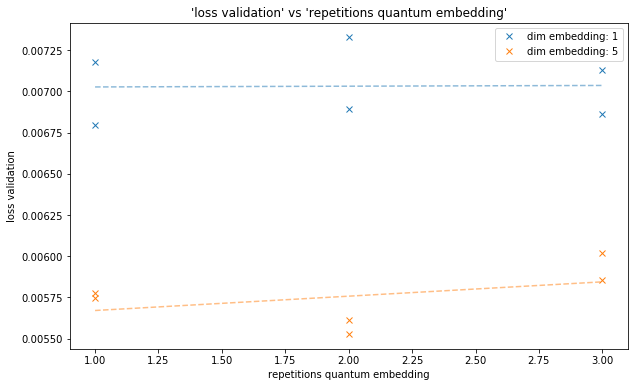

In [24]:
sweep.plot(
    x_key='embedding_n_repetitions',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=1,
    replace=[('embedding_n_repetitions', 'repetitions quantum embedding'), ('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

# sweep_12h_er_Xqm-2

In [25]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm-2',
)

In [26]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'n_layers_quantum_block', 'embedding_n_layers', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

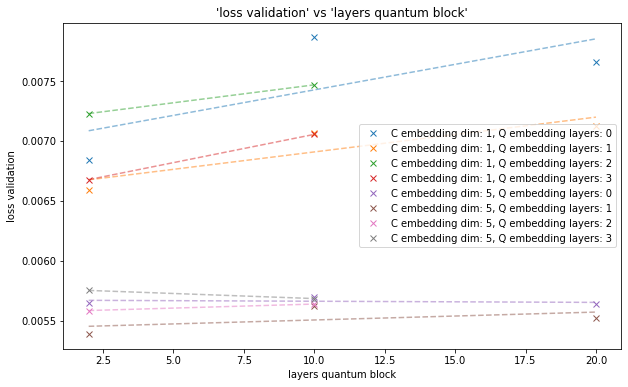

In [27]:
sweep.plot(
    x_key='n_layers_quantum_block',
    y_key='loss_validation',
    legend_keys=['embedding_dim', 'embedding_n_layers'],
    fit_degree=1,
    replace=[('embedding_n_layers', 'Q embedding layers'), ('embedding_dim', 'C embedding dim'), ('loss_validation', 'loss validation'), ('n_layers_quantum_block', 'layers quantum block')],
)

# sweep_12h_er_Xqm_v2-2

In [32]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0919',
    file_name='sweep_12h_er_Xqm_v2-2',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'embedding_n_repetitions', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

In [35]:
sweep.lists['n_parameters']

[408, 408, 408, 772, 772, 772, 408, 408, 408, 772, 772, 772]

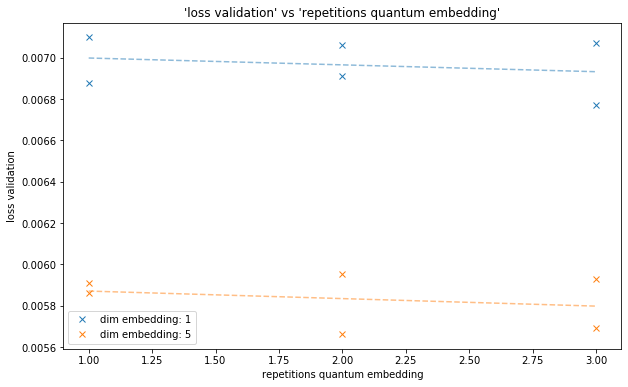

In [33]:
sweep.plot(
    x_key='embedding_n_repetitions',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=1,
    replace=[('embedding_n_repetitions', 'repetitions quantum embedding'), ('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

# sweep_12h_er_Xqm_v3-1

In [ ]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm_v3-1',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

TypeError: expected 1D vector for x

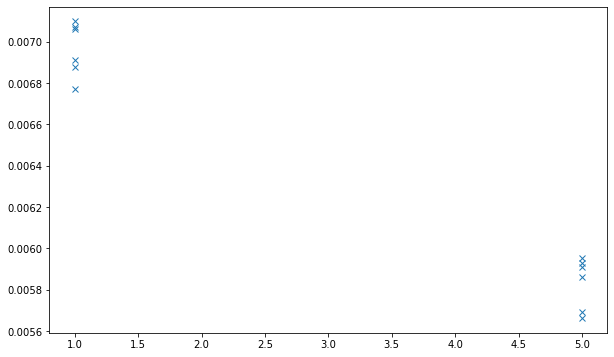

In [30]:
sweep.plot(
    x_key='embedding_dim',
    y_key='loss_validation',
    legend_keys=[],
    fit_degree=1,
    replace=[],
)